## Classifying newswires
Build a network to classify Reuters newswires into 46 mutually exclusive topics

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
                                                      

In [3]:
x_train.shape

(8982,)

In [4]:
y_train.shape

(8982,)

In [5]:
x_test.shape

(2246,)

In [6]:
y_test.shape

(2246,)

In [7]:
import numpy as np

In [8]:
x_train

array([ list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110

from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=10000)
x_test = sequence.pad_sequences(x_test, maxlen=10000)
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)

### Preprocess Data

In [9]:
import numpy as np

In [10]:
def vectorize_sequences(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [11]:
x_train1= vectorize_sequences(x_train)
x_train1

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.]])

In [12]:
x_train1.shape

(8982, 10000)

In [13]:
x_test1= vectorize_sequences(x_test)
x_test1

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.]])

In [14]:
x_test1.shape

(2246, 10000)

In [15]:
for i,sequence in enumerate(x_train):
    print(i,sequence)

0 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
1 [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
2 [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2678, 9

488 [1, 8295, 111, 8, 25, 166, 5, 863, 4004, 524, 42, 120, 9, 300, 5, 322, 2289, 13, 4, 322, 5, 8295, 31, 10, 304, 5, 38, 270, 81, 10, 73, 2612, 49, 8295, 8, 25, 166, 5, 863, 4004, 524, 4, 322, 7, 10, 163, 381, 145, 8295, 8, 4, 120, 9, 300, 5, 322, 1976, 24, 137, 79, 5, 8295, 111, 175, 80, 45, 381, 27, 38, 270, 81, 58, 25, 671, 33, 30, 2197, 1933, 4, 322, 172, 4, 866, 6, 839, 102, 544, 15, 90, 67, 7, 197, 17, 12]
489 [1, 1563, 331, 421, 78, 2110, 5, 974, 283, 22, 547, 372, 13, 93, 91, 950, 9, 1452, 4, 66, 1674, 4, 964, 6, 337, 42, 549, 78, 2110, 28, 4, 314, 96, 13, 91, 252, 950, 4, 561, 1085, 8, 1009, 1149, 9, 716, 2795, 9, 2, 9826, 9, 2, 286, 8, 77, 385, 1559, 2110, 28, 3597, 352, 15, 10, 663, 3102, 13, 93, 91, 9, 62, 1452, 986, 6, 337, 42, 2571, 1587, 366, 28, 4, 314, 96, 13, 91, 252, 28, 4, 2193, 622, 334, 13, 109, 6, 188, 2110, 5, 3793, 381, 331, 4, 334, 64, 528, 13, 10, 1559, 1587, 5, 3224, 9, 78, 6, 109, 2110, 5, 93, 91, 17, 12]
490 [1, 192, 510, 1543, 10, 39, 4486, 5, 61, 745, 3

1055 [1, 2420, 141, 71, 8, 56, 232, 6181, 71, 40, 931, 560, 4, 347, 5, 25, 116, 13, 8980, 2965, 381, 80, 4, 49, 8, 4, 619, 415, 5, 25, 166, 363, 6, 668, 565, 145, 6, 888, 52, 116, 9, 4, 68, 2333, 94, 68, 27, 56, 9008, 672, 71, 10, 1658, 34, 2418, 6, 452, 107, 4, 415, 1086, 43, 731, 331, 2420, 8, 232, 2, 6576, 672, 71, 323, 40, 560, 4, 513, 5, 197, 16, 23, 770, 13, 366, 2420, 67, 27, 388, 26, 6, 614, 388, 15, 184, 4, 347, 5, 4, 7641, 5, 10, 67, 5, 4383, 6576, 672, 617, 6, 30, 777, 34, 560, 147, 26, 6, 61, 388, 15, 232, 6181, 414, 976, 258, 59, 20, 5, 8980, 80, 17, 12]
1056 [1, 5158, 267, 2, 9, 2, 734, 9721, 2, 10, 38, 2, 111, 8, 858, 131, 186, 202, 967, 83, 20, 7, 48, 1435, 88, 138, 27, 78, 20, 4, 858, 131, 784, 202, 6, 4170, 11, 1210, 22, 4903, 11, 7, 105, 21, 88, 333, 22, 47, 19, 35, 6, 47, 32, 35, 1506, 39, 186, 5, 4482, 11, 1210, 112, 5964, 11, 7, 105, 186, 90, 119, 3556, 67, 1606, 22, 321, 1036, 1210, 6, 119, 425, 1210, 51, 4, 49, 344, 42, 729, 119, 20, 275, 127, 108, 2406, 7, 48, 

2194 [1, 4902, 2347, 308, 33, 328, 1316, 127, 282, 6, 148, 6, 28, 602, 142, 35, 15, 27, 153, 89, 22, 10, 146, 5, 1031, 47, 32, 35, 28, 153, 104, 443, 790, 8, 60, 5, 1803, 754, 551, 127, 282, 138, 6, 12, 767, 35, 28, 153, 110, 22, 12, 831, 35, 10, 29, 157, 2, 2, 621, 1030, 28, 4, 56, 8182, 60, 149, 8, 4902, 470, 198, 1024, 25, 1577, 274, 128, 140, 127, 1846, 7, 25, 80, 76, 9, 815, 127, 205, 1500, 22, 130, 1857, 6, 4, 1332, 769, 154, 2364, 162, 138, 258, 47, 20, 7, 48, 9, 55, 133, 6, 1163, 395, 102, 20, 52, 29, 790, 8, 10, 37, 38, 3985, 223, 8, 54, 139, 1803, 114, 1864, 142, 20, 573, 851, 260, 542, 159, 7, 89, 84, 22, 10, 5692, 5, 12, 63, 20, 13, 48, 9, 12, 61, 20, 7, 105, 2, 8, 107, 168, 159, 1579, 28, 25, 143, 2401, 9, 65, 87, 9, 181, 689, 631, 1334, 4, 142, 35, 89, 282, 572, 330, 3883, 30, 625, 1803, 2, 127, 282, 6, 439, 340, 619, 2964, 743, 9, 1051, 689, 4, 572, 23, 1279, 6, 142, 9, 10, 327, 8214, 687, 5, 203, 17, 12]
2195 [1, 2469, 81, 8, 10, 896, 3217, 850, 7, 50, 16, 23, 359, 2784

2686 [1, 293, 1277, 2319, 3915, 1165, 218, 8, 16, 200, 6, 337, 25, 2, 304, 6, 10, 103, 727, 27, 4, 4359, 195, 2, 2, 316, 62, 45, 889, 2, 5982, 4, 49, 50, 2840, 5559, 563, 270, 2630, 9, 538, 2159, 9, 2, 7, 7374, 36, 385, 16, 6, 3915, 7, 2785, 17, 12]
2687 [1, 6219, 670, 1910, 4, 121, 7, 4, 6683, 665, 2345, 2, 4, 1719, 224, 378, 110, 9, 2347, 1166, 13, 4, 1182, 5140, 570, 1119, 2, 411, 57, 45, 85, 4446, 2, 1813, 8, 7, 25, 1213, 909, 4, 1710, 245, 1078, 4, 5140, 33, 30, 581, 52, 29, 6869, 13, 4, 121, 273, 104, 272, 62, 2557, 3882, 1232, 5, 376, 2299, 532, 10, 1364, 135, 13, 4, 760, 5, 44, 1038, 11, 112, 44, 1063, 28, 4, 314, 1885, 54, 29, 931, 16, 2301, 24, 665, 2793, 157, 21, 2, 34, 777, 7, 4, 6869, 285, 2, 1813, 8, 144, 23, 325, 126, 2906, 43, 6, 700, 389, 1358, 463, 665, 23, 325, 554, 43, 3322, 40, 2, 719, 6, 42, 153, 31, 135, 6683, 463, 828, 228, 59, 47, 11, 1232, 9, 88, 3825, 28, 967, 59, 32, 11, 144, 55, 10, 804, 6446, 4717, 1232, 325, 7, 4, 1914, 5, 686, 2, 973, 9, 2841, 144, 55, 4

3372 [1, 1339, 81, 8, 16, 33, 116, 83, 132, 15, 10, 67, 7, 197, 47, 132, 15, 7, 1612, 1265, 9, 10, 19, 47, 67, 7, 10, 73, 49, 13, 366, 3912, 643, 71, 67, 335, 1339, 8, 25, 344, 116, 1398, 2, 117, 4, 116, 5, 83, 425, 15, 10, 67, 7, 197, 9, 47, 557, 15, 5, 645, 6547, 721, 1265, 170, 27, 9799, 270, 71, 1276, 27, 8882, 362, 1339, 265, 6213, 3542, 297, 3147, 10, 103, 50, 976, 134, 352, 20, 5, 8882, 158, 44, 11, 335, 79, 8, 4, 1339, 416, 23, 69, 68, 150, 793, 97, 4, 724, 116, 3542, 384, 8, 7, 10, 845, 31, 4, 221, 9, 108, 259, 36, 2613, 4, 3912, 2, 1450, 34, 2, 4, 1339, 1080, 8, 36, 34, 3744, 27, 100, 3912, 261, 6, 343, 42, 116, 480, 211, 5, 8882, 2327, 323, 7, 104, 4, 362, 103, 727, 27, 195, 1850, 1058, 292, 363, 13, 10, 2791, 19, 11, 150, 2542, 1450, 34, 1416, 6, 263, 3912, 13, 69, 2791, 19, 11, 15, 10, 897, 1330, 21, 4, 1450, 116, 23, 772, 13, 252, 188, 17, 12]
3373 [1, 4, 896, 3028, 1998, 491, 33, 494, 1063, 18, 82, 5, 229, 22, 392, 7, 1421, 89, 729, 22, 4, 48, 320, 42, 491, 176, 118, 371

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [16]:
#from keras.utils.np_utils import to_categorical

#x_train2 = to_categorical(x_train)
#x_test2= to_categorical(x_test)

## Preprocess Label

In [17]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [19]:
y_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## Building Network

In [20]:
from keras import models, layers

In [21]:
model= models.Sequential()

In [22]:
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


# Compile

In [24]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


# Create cross hold out validation set

In [32]:
X_val=x_train1[:1000]
New_X_train=x_train1[1000:]

In [33]:
y_val=y_train[:1000]
new_y_train=y_train[1000:]

In [34]:
history= model.fit(New_X_train, new_y_train, epochs=20, batch_size=512,validation_data=(X_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s - loss: 2.5271 - acc: 0.4961 - val_loss: 1.7201 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 2s - loss: 1.4468 - acc: 0.6880 - val_loss: 1.3483 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 1.0964 - acc: 0.7640 - val_loss: 1.1704 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.8700 - acc: 0.8156 - val_loss: 1.0824 - val_acc: 0.7560
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.7032 - acc: 0.8483 - val_loss: 0.9843 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9389 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.4591 - acc: 0.9052 - val_loss: 0.9096 - val_acc: 0.8050
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.3699 - a

# Plotting training and validation loss

In [35]:
import matplotlib.pyplot as plt

In [36]:
loss_value= history.history['loss']
val_loss_value= history.history['val_loss']
acc = history.history['acc']


In [38]:
epochs= range(1,len(acc)+1)

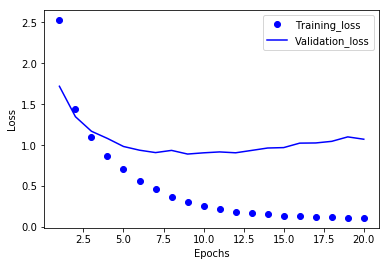

In [39]:
#Plot train and validation loss
plt.plot(epochs,loss_value,'bo',label='Training_loss')
plt.plot(epochs,val_loss_value,'b',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

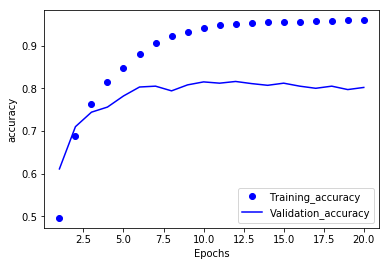

In [40]:
#Plot train and validation accuracy
accuracy_value= history.history['acc']
val_accuracy_value= history.history['val_acc']
plt.plot(epochs,accuracy_value,'bo',label='Training_accuracy')
plt.plot(epochs,val_accuracy_value,'b',label='Validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [43]:
## Retraining the model from sctratch on 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train1, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test1, y_test)
results
#loss,accuracy

Epoch 1/9
8982/8982 [==============================] - 2s - loss: 0.0710 - acc: 0.9808     
Epoch 2/9
8982/8982 [==============================] - 1s - loss: 0.0402 - acc: 0.9890     
Epoch 3/9
8982/8982 [==============================] - 1s - loss: 0.0308 - acc: 0.9915     
Epoch 4/9
8982/8982 [==============================] - 1s - loss: 0.0251 - acc: 0.9929     
Epoch 5/9
8982/8982 [==============================] - 1s - loss: 0.0205 - acc: 0.9941     
Epoch 6/9
8982/8982 [==============================] - 1s - loss: 0.0170 - acc: 0.9950     
Epoch 7/9
8982/8982 [==============================] - 1s - loss: 0.0141 - acc: 0.9958     
Epoch 8/9
8982/8982 [==============================] - 1s - loss: 0.0119 - acc: 0.9963     
Epoch 9/9
2112/2246 [===========================>..] - ETA: 0s

[0.031553261194341646, 0.99162765220139348]

In [46]:
predictions=model.predict(x_test1)
predictions

array([[  3.70218986e-05,   1.12278867e-04,   7.89825754e-06, ...,
          6.13554357e-06,   5.65877781e-06,   9.79260949e-06],
       [  6.13029813e-03,   1.35252823e-03,   2.38964913e-06, ...,
          4.49002437e-06,   1.37201278e-06,   1.20966188e-05],
       [  3.59405275e-03,   7.43918955e-01,   1.85660389e-03, ...,
          7.44821809e-05,   9.03973560e-05,   4.50395346e-05],
       ..., 
       [  5.68382666e-06,   1.20562487e-04,   9.78268872e-06, ...,
          1.71505883e-06,   3.94211793e-06,   2.66262509e-06],
       [  7.21993670e-03,   8.77098218e-02,   1.29155535e-02, ...,
          6.70226000e-04,   2.52083701e-04,   2.24623433e-03],
       [  6.24257082e-04,   2.45269015e-01,   1.12011582e-02, ...,
          3.38221202e-04,   1.62365614e-04,   1.04446524e-04]], dtype=float32)

In [48]:
np.argmax(predictions[0])
#The largest entry is the predicted class with highest probability

3